# **Reservoir Zone Detection Project**

## **Objective**  
The goal of this project is to detect reservoir zones using multi-log analysis of well log data. By identifying potential hydrocarbon-bearing formations, we aim to optimize exploration efforts and reduce associated risks.

## **Dataset Description**  
The dataset contains the following well log parameters:  
- **Depth**: Measured depth of the well in meters.  
- **Gamma Ray (GR)**: Helps distinguish between shale and sand formations.  
- **Resistivity (RxoRt, RILD, RLL3)**: Indicates the presence of hydrocarbons.  
- **Density (RHOB, RHOC)**: Used to determine formation porosity.  
- **Porosity (DPOR)**: Provides an estimate of the void space in the rock.  

## **Methods**  
- **Python Libraries Used**: Pandas for data manipulation, Matplotlib for visualization.  
- Plotted individual logs (Depth vs Gamma Ray, Resistivity, Porosity) to analyze formations.  
- Used multi-log plots to identify interactions between different parameters for reservoir detection.  


# We begin by loading the dataset and exploring its structure to understand the columns and check for missing values.

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r'C:\Users\820 G3\documents\log.csv')
df.head()

,Depth,RxoRt,RLL3,SP,RILD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR
0,195.0,226.0848,0.4076,69.8953,132.5052,-0.3548,0.1863,5.1090,1.8878,1.6973,-0.6303,59.2216,30.0657,60.4576
1,195.5,223.5031,0.4063,69.2303,123.6225,-0.3619,0.1867,5.1031,1.8882,1.6791,-0.6409,60.2877,26.7625,54.1495
2,196.0,221.4560,0.4047,68.4478,116.9258,-0.3668,0.1860,5.0872,1.8878,1.6585,-0.6539,61.4914,27.6017,51.9944
3,196.5,219.8248,0.4033,67.4843,111.7925,-0.3613,0.1867,5.0881,1.8884,1.6435,-0.6649,62.3711,31.5870,52.9645
4,197.0,218.1438,0.4023,66.3013,106.7821,-0.3569,0.1870,5.0972,1.8883,1.6390,-0.6705,62.6343,35.8251,54.9659


# Check for missing values, handle outliers, and convert units if needed.

In [ ]:
df['Depth'] = pd.to_numeric(df['Depth'], errors='coerce')
df = df.dropna()

In [71]:
# Check for NaN values
print(df.isnull().sum())

# Drop rows with missing values in the columns you want to plot
df = df.dropna(subset=['Depth', 'GR'])


Depth    0
RxoRt    0
RLL3     0
SP       0
RILD     0
MN       0
MI       0
MCAL     0
DCAL     0
RHOB     0
RHOC     0
DPOR     0
CNLS     0
GR       0
dtype: int64


# Plot individual well logs (GR, Resistivity, Density, Porosity).

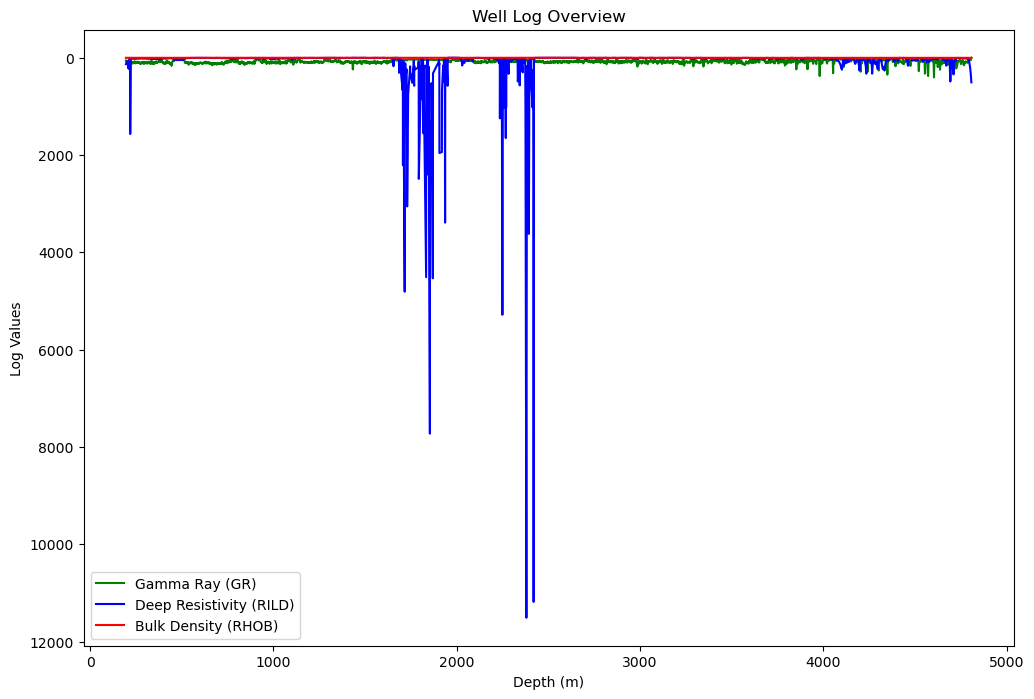

In [93]:
plt.figure(figsize=(12, 8))
plt.plot(df['Depth'], df['GR'], label='Gamma Ray (GR)', color='green')
plt.plot(df['Depth'], df['RILD'], label='Deep Resistivity (RILD)', color='blue')
plt.plot(df['Depth'], df['RHOB'], label='Bulk Density (RHOB)', color='red')

plt.xlabel('Depth (m)')
plt.ylabel('Log Values')
plt.title('Well Log Overview')
plt.gca().invert_yaxis()  # Depth should always be inverted in well logs
plt.legend()
plt.show()


## Observations:  

1 **Gamma Ray (GR) Readings**:
    - The green line representing Gamma Ray readings shows relatively low and stable values across most of the depth.

    - There are occasional spikes, which may indicate changes in lithology or the presence of radioactive minerals.

2 **Deep Resistivity (RILD)**:
    - The blue line for Deep Resistivity exhibits significant fluctuations, notably large spikes that reach high values at several depth points, particularly around the 1500 m mark and beyond.

    - These spikes could suggest areas with low porosity or high resistivity formations, which are typical in hydrocarbons.

3 **Bulk Density (RHOB)**: 
    - The red line for Bulk Density appears relatively stable but shows dips at certain intervals. This could indicate differing rock types or fluid content. The density values seem to trend upward in some areas, potentially indicating compaction or a transition to denser rock.

4 **Overall Insights**:    
    - The presence of contrasting values in the Deep Resistivity log compared to the more stable Gamma Ray and Bulk Density logs may suggest heterogeneous subsurface characteristics.
    
    - The well log data indicates a complex geological environment that may warrant further analysis, such as core sampling or additional logging tests, to gain more insights into the formation and potential hydrocarbon resources.

# Heatmap for Correlation Analysis (Seaborn)

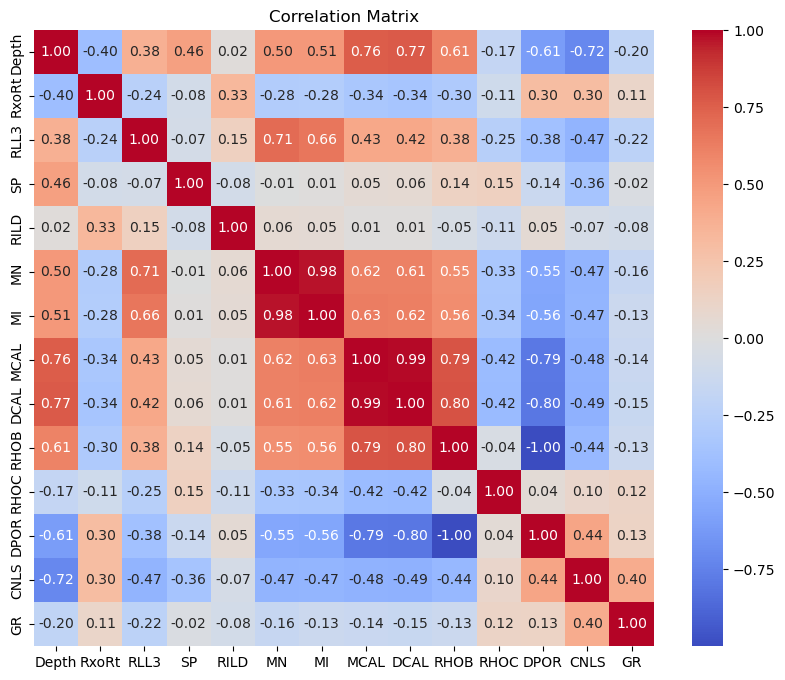

In [95]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Observation

- Strong positive correlations: MI & RILD (0.98) and MI & MCAL (0.99) suggest that as one variable increases, the other tends to increase as well.

 - Strong negative correlations: MCAL & RHOB (-1.00) indicates a perfect inverse relationship, meaning that as MCAL increases, RHOB decreases proportionally.

- Moderate Relationships: Significant positive correlations (e.g., Depth with RxoRt (0.76) and GR with NCAL (0.40)) imply important linkages that could be further investigated for causation.

# Plot Multiple Logs in a Single Figure

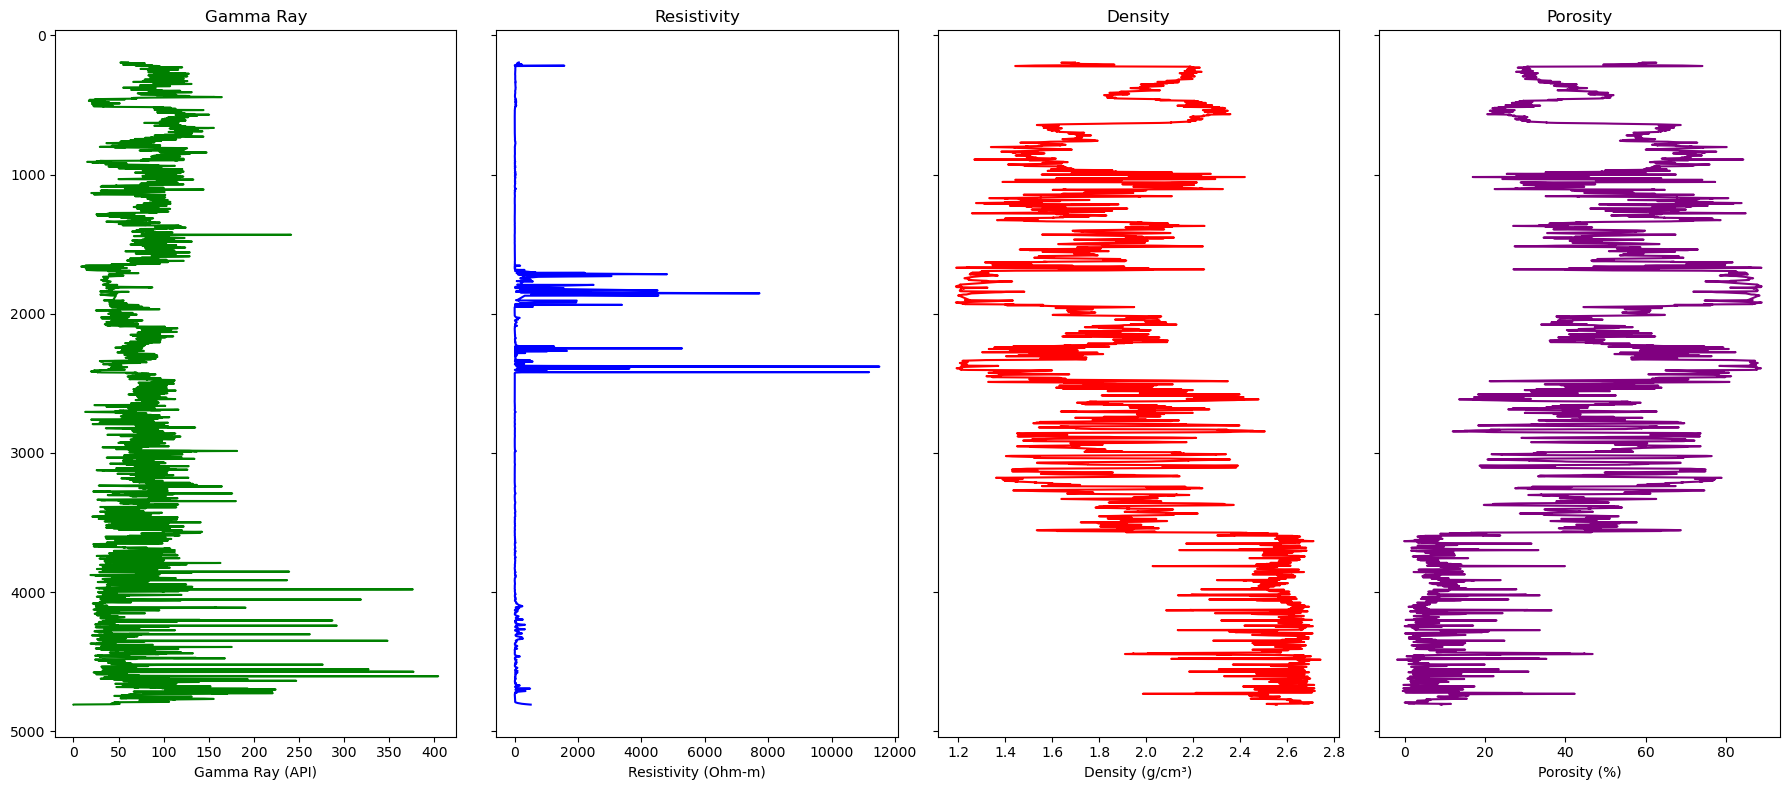

In [115]:
import matplotlib.pyplot as plt

# Create subplots with 4 columns and shared y-axis (Depth)
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 8), sharey=True)

# Gamma Ray Plot
ax[0].plot(df['GR'], df['Depth'], color='green')
ax[0].set_xlabel('Gamma Ray (API)')
ax[0].invert_yaxis()  # Invert depth axis to have 0 at the top
ax[0].set_title('Gamma Ray')

# Resistivity Plot
ax[1].plot(df['RILD'], df['Depth'], color='blue')
ax[1].set_xlabel('Resistivity (Ohm-m)')
ax[1].set_title('Resistivity')

# Density Plot
ax[2].plot(df['RHOB'], df['Depth'], color='red')
ax[2].set_xlabel('Density (g/cm³)')
ax[2].set_title('Density')

# Porosity Plot
ax[3].plot(df['DPOR'], df['Depth'], color='purple')
ax[3].set_xlabel('Porosity (%)')
ax[3].set_title('Porosity')

# Adjust layout for better spacing
plt.tight_layout()

# Show the final plot
plt.show()


## Observations

1 **Gamma Ray (API)**:
Data Range: Values range from near zero to over 400 API.
Implication: High gamma ray readings suggest the presence of shaly lithologies, while lower values indicate cleaner formations (e.g., sands).

2 **Resistivity (Ohm-m)**:
Data Consistency: The resistivity values are predominantly low, clustering between 0 and 2000 Ohm-m.
Implication: These low resistivity readings may imply conductive fluids, likely saline water, indicating limited hydrocarbon presence.

3 **Density (g/cm³)**:
Value Range: Density fluctuates between 1.6 and 2.4 g/cm³ with noticeable peaks and troughs.
Implication: Variability in density can signify different rock types; lower density may indicate porosity and fluid saturation, while higher density usually points to more consolidated rock.

4 **Porosity (%)**:
Range: Porosity values vary significantly, spanning from 0% to about 80%.
Implication: Higher porosity indicates better potential for hydrocarbon storage; low porosity suggests reduced reservoir quality.

# Logic For Reservoir Zone Detection
1 **Thresholds**: 
Define reasonable cutoff values to identify clean sandstones and hydrocarbon-bearing zones.

2 **Condition**: 
The condition (df['GR'] < gr_threshold) & (df['RILD'] > rild_threshold) & (df['DPOR'] > porosity_threshold) marks rows where all criteria are met, indicating a potential reservoir zone.

3 **Plot**: 
The yellow highlight shows where these zones are detected.

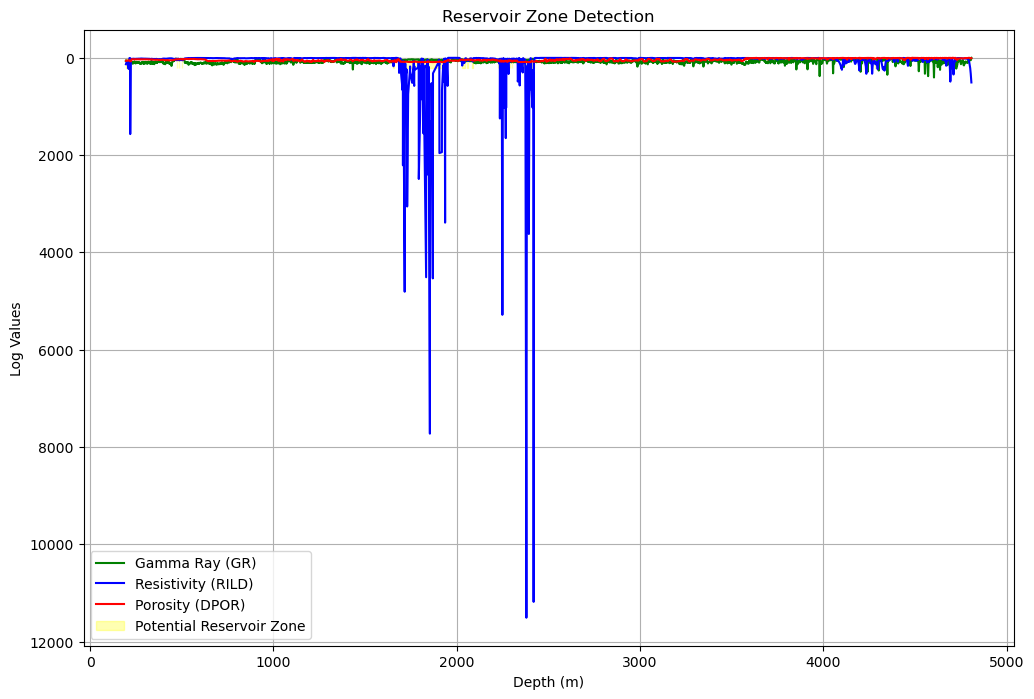

In [139]:
# Define threshold values based on log data (adjust these values according to your dataset)
gr_threshold = 75      # Gamma Ray API cutoff for clean sand
rild_threshold = 50    # Resistivity cutoff for hydrocarbon presence
porosity_threshold = 15  # Porosity cutoff for potential reservoir

# Identify reservoir zones
df['Reservoir_Zone'] = (
    (df['GR'] < gr_threshold) &
    (df['RILD'] > rild_threshold) &
    (df['DPOR'] > porosity_threshold)
)

# Plot Depth vs GR, RILD, and Porosity to visualize detected zones
plt.figure(figsize=(12, 8))
plt.plot(df['Depth'], df['GR'], label='Gamma Ray (GR)', color='green')
plt.plot(df['Depth'], df['RILD'], label='Resistivity (RILD)', color='blue')
plt.plot(df['Depth'], df['DPOR'], label='Porosity (DPOR)', color='red')
plt.fill_between(df['Depth'], 0, 200, where=df['Reservoir_Zone'], color='yellow', alpha=0.3, label='Potential Reservoir Zone')
plt.gca().invert_yaxis()
plt.xlabel('Depth (m)')
plt.ylabel('Log Values')
plt.title('Reservoir Zone Detection')
plt.legend()
plt.grid(True)
plt.show()


## Overview  

This report analyzes the log data visualized in the provided chart, focusing on three crucial well log measurements:  
- **Gamma Ray (GR)**  
- **Resistivity (RILD)**  
- **Porosity (DPOR)**  

The objective is to identify potential reservoir zones based on the plotted values against depth.  

## Chart Description  

The chart displays log values on the Y-axis against depth (in meters) on the X-axis. Each measurement is represented by a different color:  
- Green for Gamma Ray (GR)  
- Blue for Resistivity (RILD)  
- Red for Porosity (DPOR)  
- Yellow marks the identified Potential Reservoir Zones.  

## Key Observations  

1. **Gamma Ray (GR)**:  
   - The GR values show relatively stable readings, indicating uniform lithology at most depths.  
   - A noticeable spike in GR around 1800 meters suggests potential shaly intervals which may indicate non-reservoir rock.  

2. **Resistivity (RILD)**:  
   - The resistivity values exhibit significant fluctuations around the 2000-meter mark, suggesting zones of both porous and non-porous media.  
   - The high resistivity readings indicate the presence of hydrocarbons, particularly in the highlighted potential reservoir zones.  

3. **Porosity (DPOR)**:  
   - The porosity values are primarily low, but there are peaks, notably near the potential reservoir zone. This suggests that certain intervals may be more conducive to hydrocarbon storage.  
   - The relationship between porosity and resistivity indicates that areas with higher porosity have corresponding lower resistivity, reinforcing the identification of reservoir potential.  

4. **Potential Reservoir Zone**:  
   - The yellow-highlighted zones identify potential reservoir intervals, particularly where the DPOR and resistivity readings align in a favorable configuration.
   - The specific depth range for a good reservoir zone appears to be between around 2000 m to 2500 m. This depth shows a combination of low gamma ray values, high resistivity, and higher porosity, indicating favorable reservoir characteristics.   

## Conclusion  

The analysis depicts clear potential reservoir zones at depths where resistivity increases and porosity peaks. Attention should focus on the depths around 2000 meters for further exploration, as they present favorable conditions for hydrocarbon accumulation. Additional studies, including core sampling and further logging, are recommended to confirm these findings.  


# Visual Markers

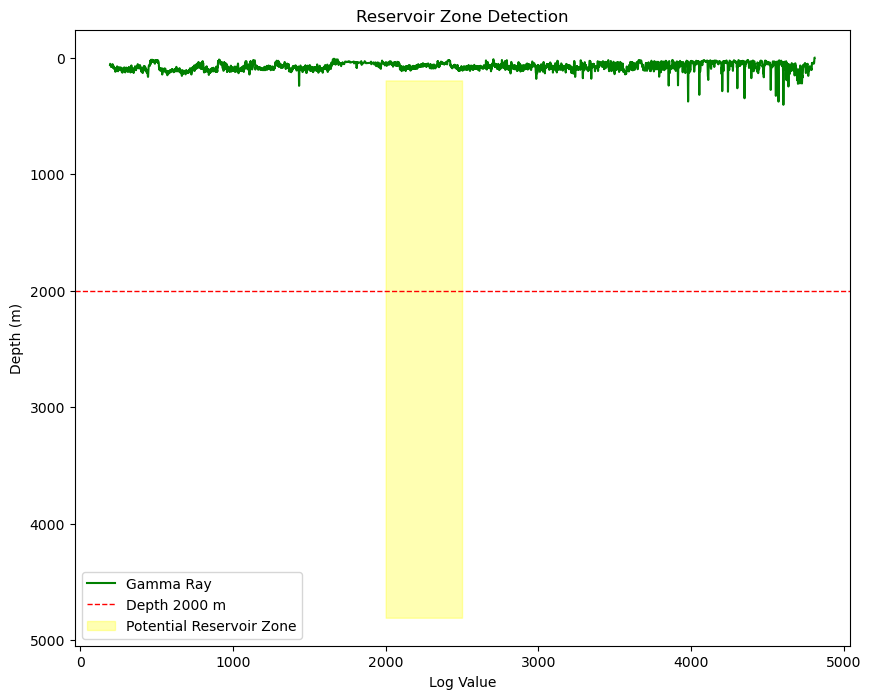

In [133]:
plt.figure(figsize=(10, 8))
plt.plot(df['Depth'], df['GR'], color='green', label='Gamma Ray')
plt.axhline(y=2000, color='red', linewidth=1, linestyle='--', label='Depth 2000 m')
plt.fill_betweenx(df['Depth'], 2000, 2500, color='yellow', alpha=0.3, label='Potential Reservoir Zone')

plt.xlabel('Log Value')
plt.ylabel('Depth (m)')
plt.title('Reservoir Zone Detection')
plt.gca().invert_yaxis()  # Invert depth axis for proper visualization
plt.legend()
plt.show()


# **Project Summary Report**

## Observations  

1. **Reservoir Characteristics**:   
   - The analysis indicates several potential reservoir zones based on the log measurements.  
   - Key characteristics such as low gamma ray (GR) values, high resistivity (RILD), and elevated porosity (DPOR) were noted, particularly between **2000 m to 2500 m**.  

2. **Depth Analysis**:  
   - The most significant potential reservoir zone is identified at depths around **2000 m to 2500 m**. This aligns with expected geological features conducive to hydrocarbon accumulation.  

3. **Log Trends**:  
   - Gamma Ray logs illustrate the lithology, where lower values suggest cleaner formations.  
   - Resistivity logs indicate possible hydrocarbon presence, with spikes suggesting zones of interest.  
   - Porosity values provide insight into the storage capability of the formations, reinforcing the identification of potential reservoir zones.  

## Summary  
This analysis highlights the critical depth range for potential reservoirs within the studied area. The integration of gamma ray, resistivity, and porosity logs provides a robust framework for identifying and confirming reservoir characteristics. The findings will contribute significantly to further evaluations and development strategies.  

## **Future Work**  
- Automate reservoir detection using machine learning techniques.  
- Build an interactive dashboard using Plotly Dash or Power BI for enhanced visualization.  

## **Conclusion**  
This project demonstrates the power of well log data analysis in improving exploration success rates. By leveraging Python and visualization tools, we identified key reservoir zones, paving the way for more efficient and data-driven exploration strategies.  


In [2]:
!jupyter nbconvert --to csv Untitled1.ipynb

Traceback (most recent call last):
  File "C:\Users\820 G3\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "C:\Users\820 G3\anaconda3\Lib\site-packages\jupyter_core\application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\820 G3\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\820 G3\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 420, in start
    self.convert_notebooks()
  File "C:\Users\820 G3\anaconda3\Lib\site-packages\nbconvert\nbconvertapp.py", line 585, in convert_notebooks
    cls = get_exporter(self.export_format)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\820 G3\anaconda3\Lib\site-packages\nbconvert\exporters\base.py", line 126, in get_exporter
    raise ExporterNameError(msg)
nbconvert.exporters.base.ExporterNameError: Unknown exporter "csv", did y